In [135]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
import sys
np.random.seed(0)

In [2]:
raw_digits = genfromtxt('digits-raw.csv', delimiter=',')

In [36]:
for i in range(10):
    class_i_digits = raw_digits[raw_digits[:,1]==i]
    digit = np.random.choice(len(class_i_digits))
    plt.imsave(str(i)+'.png',class_i_digits[digit][2:].reshape((28,28)),format='png')

In [3]:
digits_embedding = genfromtxt('digits-embedding.csv', delimiter=',')

In [76]:
x=np.array([[1,1],[3,4]])
print (np.dot(x,x.T))
x_norm=np.linalg.norm(x, axis=1)**2
print (x_norm.reshape(-1, 1))
print(x_norm.reshape(1, -1))
print (x_norm.reshape(-1, 1) + x_norm.reshape(1, -1))
print (np.dot(x, x.T))
print ((x_norm.reshape(-1, 1) + x_norm.reshape(1, -1) - 2 * np.dot(x, x.T)))
print(np.sqrt(x_norm.reshape(-1, 1) + x_norm.reshape(1, -1) - 2 * np.dot(x, x.T)))


[[ 2  7]
 [ 7 25]]
[[ 2.]
 [25.]]
[[ 2. 25.]]
[[ 4. 27.]
 [27. 50.]]
[[ 2  7]
 [ 7 25]]
[[8.8817842e-16 1.3000000e+01]
 [1.3000000e+01 0.0000000e+00]]
[[2.98023224e-08 3.60555128e+00]
 [3.60555128e+00 0.00000000e+00]]


In [142]:
features = digits_embedding[:,2:4]

In [143]:
def get_squared_distance(p1, p2):
    sq_dist = 0
    for i in range(len(p1)):
        sq_dist +=(p1[i]-p2[i])**2
    return sq_dist

In [148]:
def get_cluster_id(centroids, feature):
    min_dist = float("inf")
    min_centroid = -1
    for i,centroid in enumerate(centroids):
        dist = get_squared_distance(feature, centroid)
        if dist < min_dist:
            min_centroid = i
            min_dist = dist
    
    return min_centroid     

In [194]:
np.random.seed(0)
k=10
centroids = []
centroid_indices = np.random.randint(0,len(features), size=k)
for index in centroid_indices:
    centroids.append(features[index])

cluster_indices = np.zeros(len(features), dtype=np.int8)
'''
repeat till 50 iterations
'''
num_iterations = 50
for iteration in range(num_iterations):
#     print (centroids)
    for i,feature in enumerate(features):
        cluster_indices[i]=get_cluster_id(centroids, feature)

    mean_x_centroids = np.zeros(k)
    mean_y_centroids = np.zeros(k)
    count_points_clusters = np.zeros(k)
    for i, feature in enumerate(features):
        mean_x_centroids[cluster_indices[i]] += feature[0]
        mean_y_centroids[cluster_indices[i]] += feature[1]
        count_points_clusters[cluster_indices[i]] += 1
    mean_x_centroids/=count_points_clusters
    mean_y_centroids/=count_points_clusters
    for i in range(len(centroids)):
        centroids[i]=[mean_x_centroids[i], mean_y_centroids[i]]

In [195]:
def get_wc_ssd(centroids, features, cluster_indices):
    wc_ssd=0
    for i, feature in enumerate(features):
        centroid = centroids[cluster_indices[i]]
        wc_ssd += get_squared_distance(feature, centroid)
    return wc_ssd

In [196]:
get_wc_ssd(centroids, features, cluster_indices)

1433531.4694124344

In [164]:
'''
Calculate silhoutte coefficient
'''
def get_SC(features, cluster_indices):
    s_i_list = np.zeros(len(features))

    features_norm = np.linalg.norm(features, axis=1)**2
    distance_squared = features_norm.reshape(-1,1)+features_norm.reshape(1,-1) - 2*np.dot(features, features.T)
    distance_squared = distance_squared.clip(min=0)
    distance_matrix = np.sqrt(distance_squared)
    
    for i, distance_i in enumerate(distance_matrix):
        same_cluster_distances = distance_i[cluster_indices==cluster_indices[i]]
        A=np.sum(same_cluster_distances)/(len(same_cluster_distances)-1)

        diff_cluster_distances = distance_i[cluster_indices!=cluster_indices[i]]
        B=np.sum(diff_cluster_distances)/(len(diff_cluster_distances))

        s_i_list[i]=(B-A)/max(A,B)

    SC = np.sum(s_i_list)/len(s_i_list)
    return SC

In [207]:
get_SC(features, cluster_indices)

0.7115334025138997

In [5]:
visualize_egs = np.random.randint(0,len(digits_embedding), size=1000)

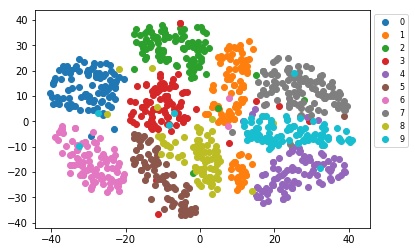

In [26]:
class_labels = [0,1,2,3,4,5,6,7,8,9]
for i in range(10):
    x_axis = []
    y_axis = []
    for eg in visualize_egs:
        digit_array = digits_embedding[eg]
        if digit_array[1] == i:
            x_axis.append(digit_array[2])
            y_axis.append(digit_array[3])
    plt.scatter(x_axis, y_axis, label=i)
plt.legend(class_labels, loc='best', fontsize=8, bbox_to_anchor=(1, 1))
plt.show()